In [1]:
# load package for market basket analysis apriori algorithm
library(arules)

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write



In [2]:
# read transactional data into a sparse matrix
fn = "top12_senators_per_precinct.csv"
senators <- read.transactions(fn, sep = ",")

In [3]:
senators

transactions in sparse format with
 90357 transactions (rows) and
 50 items (columns)

ERROR: Error in file(con, "rb"): cannot open the connection


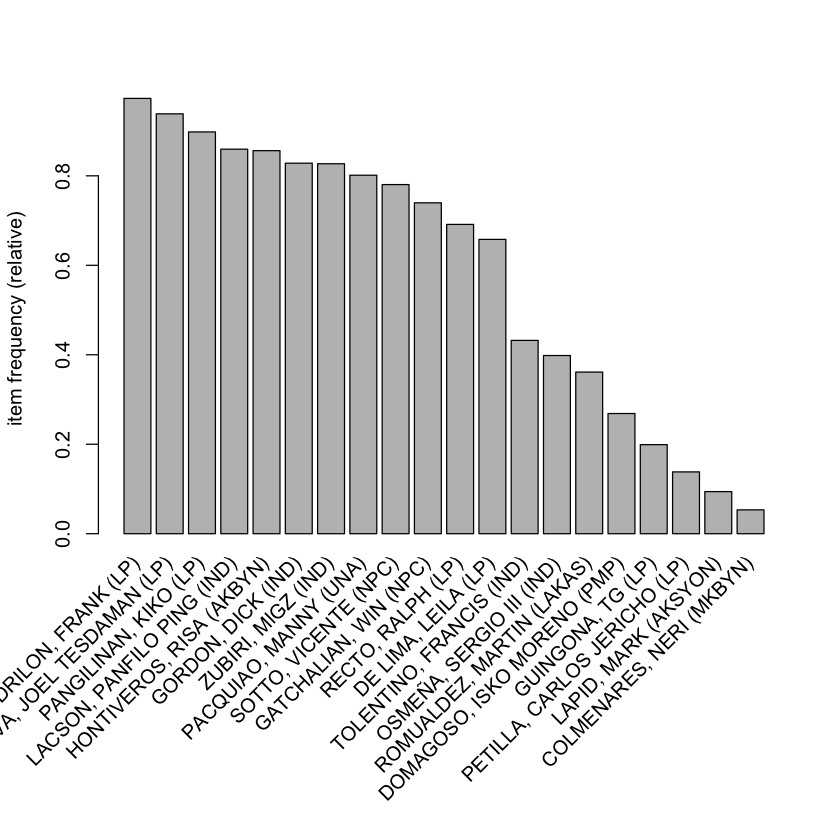

In [4]:
# plot top 20 senators in terms of frequency (equivalent to support, in this case)
itemFrequencyPlot(senators, topN = 20)

In [5]:
# get support of individual candidates -- these are shown in Fig. 1 
freq = itemFrequency(senators)
head(freq)

ALBANI, SHARIFF (IND)      ALI, ALDIN (WPPPMM)      ALUNAN, RAFFY (IND) 
             0.021105172              0.015272751              0.010547052 
     AMBOLODTO, INA (LP) ARQUIZA, GODOFREDO (IND)    BALIGOD, LEVITO (IND) 
             0.040406388              0.000420554              0.002003165

In [6]:
# save to CSV file
df_freq = as.data.frame(freq)
write.csv(df_freq, file="../output/support_senators.csv", col.names=F)

Warning message:
In write.csv(df_freq, file = "../output/support_senators.csv", col.names = F): attempt to set 'col.names' ignored

In [8]:
# get support of parties (LP and UNA) 
parties = c("\\(LP\\)", "\\(UNA\\)")
parties

[1] "\\(LP\\)"  "\\(UNA\\)"

In [10]:
## Generate matrix and convert to itemMatrix.
m <- matrix(FALSE, nrow=5, ncol=50)
#dimnames(m) <- list(NULL, paste("item", c(1:50), sep=""))
dimnames(m) <- list(NULL, names(freq))
for(ix in 1:2)
m[ix,grepl(parties[ix],names(freq))] <- TRUE

In [12]:
## create itemsets from itemMatrix  
is <- new("itemsets", items = i[1:2])
inspect(is)

  items                           
1 {AMBOLODTO, INA (LP),           
   DE LIMA, LEILA (LP),           
   DRILON, FRANK (LP),            
   GUINGONA, TG (LP),             
   PANGILINAN, KIKO (LP),         
   PETILLA, CARLOS JERICHO (LP),  
   RECTO, RALPH (LP),             
   VILLANUEVA, JOEL TESDAMAN (LP)}
2 {KIRAM, PRINCESS JACEL (UNA),   
   LACSAMANA, ALMA MORENO (UNA),  
   LANGIT, REY (UNA),             
   MONTANO, ALLAN (UNA),          
   NAPEÑAS, GETULIO (UNA),        
   PACQUIAO, MANNY (UNA)}         


In [13]:
# calculate support per itemset
support(is, senators)

[1] 0.011388160 0.000575495

In [14]:
# get rules with max. number of 5 candidates; set minimum support, confidence
rules_big <- apriori(senators, parameter = list(support =
                            0.05, confidence = 0.8, minlen = 5, maxlen=5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.8    0.1    1 none FALSE            TRUE    0.05      5      5  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4517 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 90357 transaction(s)] done [0.04s].
sorting and recoding items ... [20 item(s)] done [0.01s].
creating transaction tree ... done [0.05s].
checking subsets of size 1 2 3 4 5 done [0.12s].
writing ... [7505 rule(s)] done [0.00s].
creating S4 object  ... done [0.02s].


In [15]:
# show top rules by confidence -- these turn out to be 4-candidate groups -> Drilon, shown in Fig. 2
inspect(sort(rules_big, by="confidence")[1:15])

   lhs                                 rhs                    support confidence     lift
1  {GORDON, DICK (IND),                                                                  
    HONTIVEROS, RISA (AKBYN),                                                            
    LACSON, PANFILO PING (IND),                                                          
    RECTO, RALPH (LP)}              => {DRILON, FRANK (LP)} 0.4612482  0.9978691 1.025482
2  {LACSON, PANFILO PING (IND),                                                          
    OSMEÑA, SERGIO III (IND),                                                            
    RECTO, RALPH (LP),                                                                   
    VILLANUEVA, JOEL TESDAMAN (LP)} => {DRILON, FRANK (LP)} 0.1880430  0.9977099 1.025318
3  {OSMEÑA, SERGIO III (IND),                                                            
    PANGILINAN, KIKO (LP),                                                               
    RECTO,

In [16]:
# get rules with candidate pairs; set minimum support, confidence
rules_pairs <- apriori(senators, parameter = list(support =
                            0.05, confidence = 0.8, minlen = 2, maxlen=2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.8    0.1    1 none FALSE            TRUE    0.05      2      2  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4517 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 90357 transaction(s)] done [0.04s].
sorting and recoding items ... [20 item(s)] done [0.01s].
creating transaction tree ... done [0.05s].
checking subsets of size 1 2 done [0.00s].
writing ... [118 rule(s)] done [0.00s].
creating S4 object  ... done [0.02s].


In [17]:
# get top rules by lift -- these turn out to give the 4 graphs in Fig. 3
inspect(sort(rules_pairs, by="lift")[1:20])

   lhs                                 rhs                                 support confidence     lift
1  {LAPID, MARK (AKSYON)}           => {PACQUIAO, MANNY (UNA)}          0.08351318  0.8872428 1.107179
2  {ROMUALDEZ, MARTIN (LAKAS)}      => {PACQUIAO, MANNY (UNA)}          0.31779497  0.8795332 1.097558
3  {PETILLA, CARLOS JERICHO (LP)}   => {PACQUIAO, MANNY (UNA)}          0.11856303  0.8580010 1.070688
4  {GATCHALIAN, WIN (NPC)}          => {SOTTO, VICENTE (NPC)}           0.60816539  0.8221916 1.053456
5  {DE LIMA, LEILA (LP)}            => {PANGILINAN, KIKO (LP)}          0.62222075  0.9457182 1.052990
6  {OSMEÑA, SERGIO III (IND)}       => {ZUBIRI, MIGZ (IND)}             0.34623770  0.8692934 1.051116
7  {SOTTO, VICENTE (NPC)}           => {LACSON, PANFILO PING (IND)}     0.70000111  0.8968960 1.043426
8  {LACSON, PANFILO PING (IND)}     => {SOTTO, VICENTE (NPC)}           0.70000111  0.8143637 1.043426
9  {SOTTO, VICENTE (NPC)}           => {GORDON, DICK (IND)}             0